# Homework 2: Kaggle Ames Housing Data Competition

## Introduction to Modeling with Python
Now that we have seen some examples of modeling and using Python for modeling, we wanted to give you a chance to try your hand!

To that goal, we choose a well structured problem with plenty of resources online to help you along the way. That problem is predicting housing prices and is hosted on Kaggle:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

First, make sure you are signed up on Kaggle and then download the data:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

The data includes both testing and training sets as well as a sample submission file.

Your goal is the predict the sales price for each house where root mean squared error is the evaluation metric. To get some ideas on where to start, feel free to check out Kaggle Kernels:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

And the discussion board:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion

Again - the goal of this homework is to get you exposed to modeling with Python. Feel free to use online resources to help guide you, but we expect original thought as well. Our hope is by the end of this homework you will feel comfortable exploring data in Python and building models to make predictions. Also please submit your test results to Kaggle and let us know your ranking and score!

### Grading
This homework is due Feb. 22, 2018 by 11:59pm Utah time. By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

### Rubric:
Code Quality - 10%
Storytelling - 10%
Result on Kaggle - 5%
Describing, Cleaning, and Visualizing data - 25%
Modeling - 50%
More specifically, for modeling we will look for:

* Model Selection: Did you try multiple models? Why did you choose these models? How do they work? What are they assumptions? And how did you test/account for them? How did you select hyper-parameters?
* Model interpretation: What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results?
* Model usefulness: Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.

I start out by importing the usual suspects, and I set the format to 3 decimal points.

In [3]:
import numpy as np
import pandas as pd
import os
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

I will need to calculate some statistics later, so I import them here.

In [4]:
from scipy import stats
from scipy.stats import norm, skew

I will also be using Matplotlib and Seaborn for graphics.

In [5]:
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
import matplotlib.pyplot as plt
%matplotlib inline

I want to see what I have in my directory and make sure that I have the data there.

In [6]:
os.listdir('C:\\Users\\iriley\\Documents\\byu_econ_applied_machine_learning\\homeworks')

['.ipynb_checkpoints',
 '2018-02-22_03-35-27.png',
 'data_description.txt',
 'Homework_1.ipynb',
 'Homework_2.ipynb',
 'Homework_2_v0.ipynb',
 'Homework_2_v1.ipynb',
 'HW2_-Copy1.ipynb',
 'HW2_-Copy3.ipynb',
 'HW2_.ipynb',
 'HW2_final.ipynb',
 'Iris.csv',
 'ML Kaggle.ipynb',
 'Regularized Linear Models.ipynb',
 'sample_submission.csv',
 'submission.csv',
 'submission2.csv',
 'test.csv',
 'train.csv',
 'vars.txt']

Now I import the data and make sure it looks OK.

In [7]:
train = pd.read_csv('C:\\Users\\iriley\\Documents\\byu_econ_applied_machine_learning\\homeworks\\train.csv')
test = pd.read_csv('C:\\Users\\iriley\\Documents\\byu_econ_applied_machine_learning\\homeworks\\test.csv')

In [8]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
print(format(train.shape))
print(format(test.shape))

(1460, 81)
(1459, 80)


I'll want the IDs later, but I don't need them for training, so I'll create column vectors with them and then delete them from the data frame.

In [11]:
train_ID = train['Id']
test_ID = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

Now I'll look at the size again to make sure everything worked with the drop.

In [12]:
print(format(train.shape))
print(format(test.shape))

(1460, 80)
(1459, 79)


## Data Processing

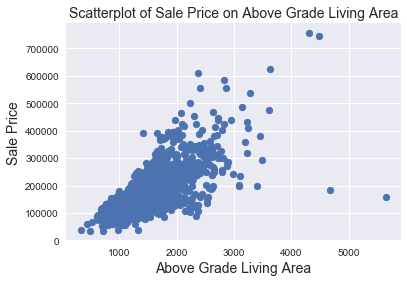

In [13]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('Sale Price', fontsize=14)
plt.xlabel('Above Grade Living Area', fontsize=14)
plt.title('Scatterplot of Sale Price on Above Grade Living Area', fontsize = 14)
plt.show()

We have 2 extreme outliers, with high living area and low price. These are extreme enough that it is safe to delete them before training our model.

In [14]:
train = train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<200000)].index)

Now to check the plot again and make sure the outliers were actually dropped:

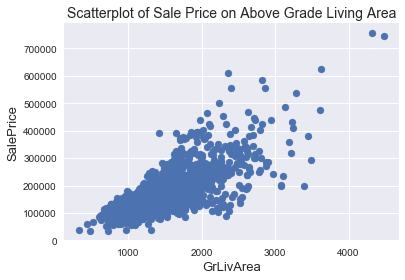

In [15]:
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.title('Scatterplot of Sale Price on Above Grade Living Area', fontsize = 14)
plt.show()

## Fixing the Target Variable

SalePrice is the variable we need to predict. So let's do some analysis on this variable first.


 mu = 180932.92 and sigma = 79467.79



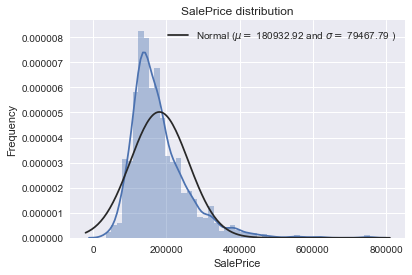

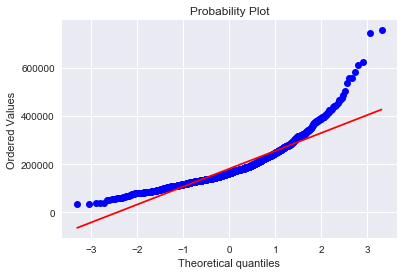

In [16]:
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution', fontsize=12)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

The target variable is skewed to the right. Linear regression methods will do better with it if I can transform it to be normally distributed.

### Log transformation of SalePrice

I will use the np.log1p method, since it takes log(1+x); it can handle 0 as an input and has 0 as its lowest possible value.

In [17]:
train["SalePrice"] = np.log1p(train["SalePrice"])

Now I plot the distribution of the transformed variable.


 mu = 12.02 and sigma = 0.40



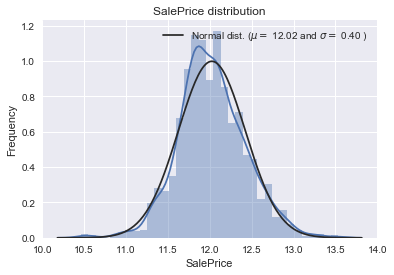

In [18]:
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
fig = plt.figure()

And I want to see the probability plot again as well.

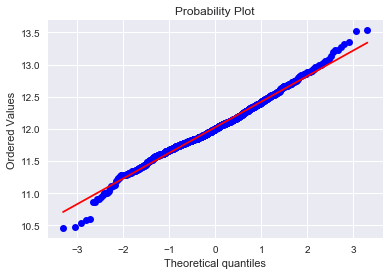

In [19]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

It looks much better this time - there is no long tail, and the data seems to be normally distributed.

### Features Engineering

I first need to concatenate the train and test data in the same dataframe, so that all the changes I make will apply to both sets.

In [20]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_ = pd.concat((train, test)).reset_index(drop=True)
all_.drop(['SalePrice'], axis=1, inplace=True)
print("all_ size is : {}".format(all_.shape))

all_ size is : (2917, 79)


### Missing Data

Now I have to do the tedious work of going through and taking care of missing values.

In [24]:
all_na = (all_.isnull().sum() / len(all_)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Percent Missing' :all_na})
missing_data.head(20)

,Percent Missing
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


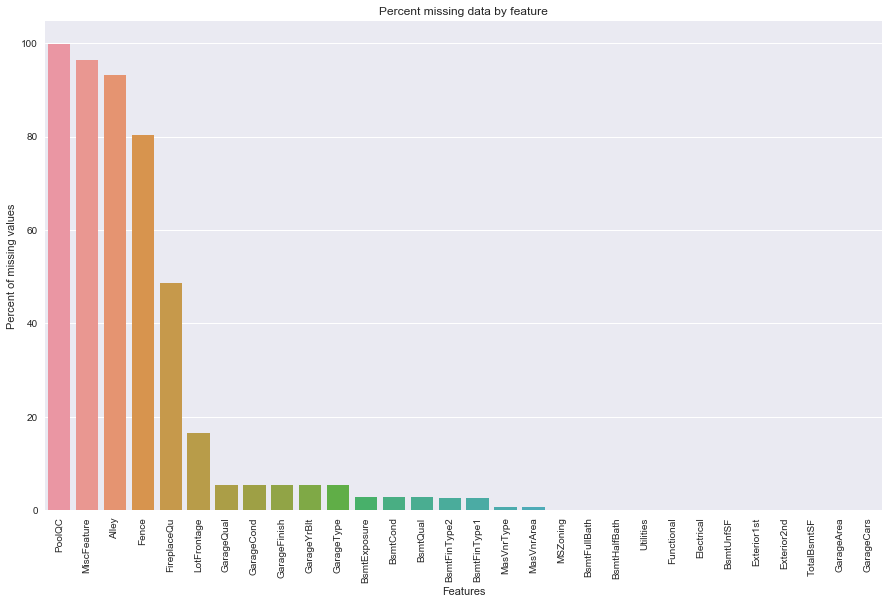

In [29]:
f, ax = plt.subplots(figsize=(15, 9))
plt.xticks(rotation='90')
sns.barplot(x=all_na.index, y=all_na)
plt.xlabel('Features')
plt.ylabel('Percent of missing values')
plt.title('Percent missing data by feature')

### Imputation of Missing Values

We impute them by proceeding sequentially through features with missing values

* PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

In [102]:
all_["PoolQC"] = all_["PoolQC"].fillna("None")

* MiscFeature: NA = "no misc feature", ok to just replace with "None"

In [103]:
all_["MiscFeature"] = all_["MiscFeature"].fillna("None")

* Alley: NA = "no alley access", so it's trivial to just replace with "None"; similar for fence

In [104]:
all_["Alley"] = all_["Alley"].fillna("None")
all_["Fence"] = all_["Fence"].fillna("None")

* FireplaceQu: NA means "no fireplace", so just replace with "None" again


In [105]:
all_["FireplaceQu"] = all_["FireplaceQu"].fillna("None")

* LotFrontage: This is probably similar to other houses in its neighborhood, so we can fill in missing values by the median LotFrontage of the neighborhood.


In [106]:
all_["LotFrontage"] = all_.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

* GarageType, GarageFinish, GarageQual and GarageCond: Here I am simply replacing missing data with 'None', since that seems like the most likely reason for values of a garage variable to be missing.

In [107]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_[col] = all_[col].fillna('None')

* GarageYrBlt, GarageArea and GarageCars : Here I am just replacing missing data with 0 (Since no garage ==> no cars in such garage.)


In [108]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_[col] = all_[col].fillna(0)

* BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath: since these all have to do with the basement, the missing values are likely zero for having no basement


In [109]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_[col] = all_[col].fillna(0)

* BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.


In [110]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_[col] = all_[col].fillna('None')

* MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.


In [111]:
all_["MasVnrType"].value_counts()

None       1766
BrkFace     879
Stone       247
BrkCmn       25
Name: MasVnrType, dtype: int64

"MasVnrArea" is a numeric variable, so NA probably means 0.

In [112]:
all_["MasVnrType"] = all_["MasVnrType"].fillna("None")
all_["MasVnrArea"] = all_["MasVnrArea"].fillna(0)

* MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'


In [113]:
all_['MSZoning'] = all_['MSZoning'].fillna(all_['MSZoning'].mode()[0])

* Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA, so mode replacement is probably fine. But this feature doesn't add anything - it has the same values for everything but 1, so I may as well drop it.

In [118]:
all_['Utilities'].describe()

In [119]:
all_ = all_.drop('Utilities', axis=1)

* Functional has NA meaning "typical", so me may as well rename it.

In [120]:
all_["Functional"] = all_["Functional"].fillna("Typical")

* Electrical has one NA value. Since this feature has mostly 'SBrkr', I can use mode replacement again for the missing value.

In [121]:
all_['Electrical'] = all_['Electrical'].fillna(all_['Electrical'].mode()[0])

* KitchenQual, Exterior1st/2nd: Only one NA value, so once again, I use the mode to replace missing values.

In [122]:
all_['KitchenQual'].value_counts()

3.000    1492
4.000    1151
5.000     203
2.000      70
Name: KitchenQual, dtype: int64

In [123]:
all_['Exterior1st'].value_counts()[:5]

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
Name: Exterior1st, dtype: int64

In [124]:
all_['Exterior2nd'].value_counts()[:5]

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
Name: Exterior2nd, dtype: int64

In [125]:
all_['KitchenQual'] = all_['KitchenQual'].fillna(all_['KitchenQual'].mode()[0])
all_['Exterior1st'] = all_['Exterior1st'].fillna(all_['Exterior1st'].mode()[0])
all_['Exterior2nd'] = all_['Exterior2nd'].fillna(all_['Exterior2nd'].mode()[0])

* SaleType: Once again, I can use the mode here. These variables just have relatively few missing values and clear modal values, so I am confident that mode replacement will not hurt the modelling.

In [126]:
all_['SaleType'].value_counts()[:5]

WD       2526
New       237
COD        87
ConLD      26
CWD        12
Name: SaleType, dtype: int64

In [127]:
all_['SaleType'] = all_['SaleType'].fillna(all_['SaleType'].mode()[0])

* MSSubClass: Since Na most likely means "no building class", I can replace missing values with None

In [128]:
all_['MSSubClass'] = all_['MSSubClass'].fillna("None")

Any more missing values?

In [129]:
all__na = (all_.isnull().sum() / len(all_)) * 100
all__na = all__na.drop(all__na[all__na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all__na})
missing_data.head()

,Missing Ratio


So no missing data are left! Now I can work on creating new factors and then finally get to the modelling portion.

### Conversion to string of non-useful numerical categorical variable:

Since there is not likely to be any predicitive value in the number values of 'MSSubClass', I will turn them into strings.

In [132]:
all_['MSSubClass'] = all_['MSSubClass'].astype(str)

#### Variable for chronological time of sale:

I also want to turn the year and month into a variable for how recently the sale was made, and then drop the year, since it will be redundant once I have a more exact time variable.

In [134]:
all_['Recent'] = 2010*12-all_['YrSold']*all_['MoSold']

In [83]:
all_ = all_.drop('YrSold', axis = 1)

I'll also want to have YearBuilt changed to age, and then drop YearBuilt:

In [156]:
all_['Age'] = 2010-all_['YearBuilt']

In [157]:
all_ = all_.drop('YearBuilt', axis = 1)

### Conversion of categorical data into numerical form, preserving order:

Some categotrical variables may contain useful information worth turning into numerical data, so here I will label encode them.

In [135]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

Since the first 10 of these have the same variables (Poor-Excellent), they will likelty have meaning if I add them up for a composite factr of house quality.

In [136]:
qual = cols[:10]
print(qual)

('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond', 'HeatingQC', 'PoolQC', 'KitchenQual')


I also need to create a dictionary to assign new values to the variables.

In [137]:
vals = {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

In [138]:
for q in list(qual):
    for v in vals.keys():
        all_[q] = all_[q].replace(v,vals[v])

Now, to check that the substitution worked, I check the values. Success!

In [139]:
for c in qual:
    print(all_[c].unique())

[ 0.  3.  4.  2.  5.  1.]
[4 3 5 0 2]
[3 4 0 2 1]
[ 3.  2.  4.  0.  5.  1.]
[ 3.  2.  0.  4.  1.  5.]
[4 3 5 2]
[3 4 2 1 5]
[5 4 3 2 1]
[ 0.  5.  2.  4.]
[ 4.  3.  5.  2.]


Since the transformation was successful, I can now create a composite of quality and interact it with size variables.

In [140]:
all_['Quality'] = 0

In [142]:
for q in qual:
    all_['Quality'] = all_['Quality']+all_[q]

In [143]:
all_['Quality'].describe()

count   2917.000
mean      27.926
std        4.478
min        8.000
25%       25.000
50%       28.000
75%       31.000
max       41.000
Name: Quality, dtype: float64

Now I'll essentially standardize it, except that I also mmake sure it is nonnegative so that I don't have to worry about negative effects in interactions.

In [144]:
all_['Quality'] = (all_['Quality']-all_['Quality'].min())/all_['Quality'].std()

In [145]:
all_['Quality'].describe()

count   2917.000
mean       4.449
std        1.000
min        0.000
25%        3.796
50%        4.466
75%        5.136
max        7.369
Name: Quality, dtype: float64

This looks pretty good, seems approximately balanced from the summary statistics. Now I'll just look at a histogram to se what its distribution seems to be.

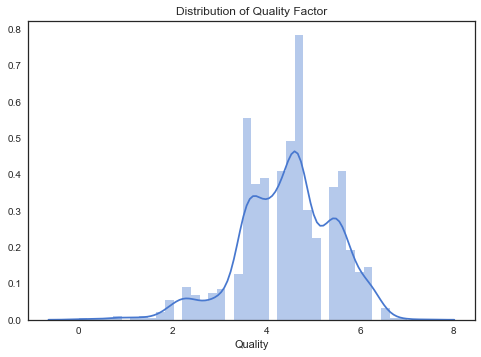

In [152]:
sns.set(color_codes=True)
sns.set(style="white", palette="muted")
plt.title('Distribution of Quality Factor')

sns.distplot(all_['Quality'])

Hmm. Not exactly normal, but it should work for machine learning anyway.

### Just an idea...

I read a paper about how things sell for more when they are in season or even when the weather changes. For example, convertibles sell betterin the spring and summer than in the winter. So I'm going to interact the pool variable and month.

In [154]:
all_['Hotstate1'] = all_['MoSold']*all_['PoolQC']
all_['Hotstate2'] = all_['MoSold']*np.log1p(all_['PoolArea'])

### Adding one more important feature

Here I add one more feature: total area.

In [161]:
all_['Footage'] = all_['TotalBsmtSF'] + all_['1stFlrSF'] + all_['2ndFlrSF']

### Creating Interactions

I want to make an interaction variable between the quality composite I made earlier and a size measure.

First, I make a composite of size measures.

In [162]:
all_['Footage'] = (all_['Footage']-all_['Footage'].min())/all_['Footage'].std()
all_['LotArea'] = (all_['LotArea']-all_['LotArea'].min())/all_['LotArea'].std()

In [163]:
all_['Size'] = 2*all_['Footage']+all_['LotArea']

In [164]:
all_['Size'].describe()

count   2917.000
mean      10.344
std        2.307
min        2.222
25%        8.662
50%        9.957
75%       12.193
max       20.441
Name: Size, dtype: float64

Now I can finally create the interaction term.

In [165]:
all_['SizeQual'] = all_['Size']*all_['Quality']
all_['SizeQual'] = np.log1p(all_['SizeQual'])

In [166]:
all_['SizeQual'].describe()

count   2917.000
mean       3.796
std        0.426
min        0.000
25%        3.567
50%        3.826
75%        4.082
max        4.756
Name: SizeQual, dtype: float64

I also want to interact size with some of the quality factors individually, and a few other possible interactions.

In [171]:
all_['SizeQual'] = all_['Size']*all_['Quality']

In [168]:
all_['SizeOQual'] = all_['Size']*all_['OverallQual']

In [169]:
all_['SizeExtQual'] = all_['Size']*all_['ExterQual']

In [177]:
all_['KitchenQualSize'] = all_['Size']*all_['KitchenQual']

In [178]:
all_['SizeQual'] = all_['Size']*all_['Quality']

In [179]:
all_['AgeQual'] = all_['Age']*all_['Quality']

In [175]:
all_['AgeSize'] = all_['Size']*all_['Age']

I will add a handful of polynomial terms as well.

In [183]:
all_['Size2'] = all_['Size']**2
all_['Q2'] = all_['Quality']**2
all_['Lot2'] = all_['LotArea']**2
all_['SizeQual2'] = all_['Size']**2
all_['AgeQual2'] = all_['Size']**2
all_['AgeSize2'] = all_['Size']**2
all_['Size5'] = all_['Size']**.5
all_['Q5'] = all_['Quality']**.5
all_['Lot5'] = all_['LotArea']**.5
all_['SizeQual5'] = all_['Size']**.5
all_['AgeQual5'] = all_['Size']**.5
all_['AgeSize5'] = all_['Size']**.5

### I also need to deal with skewness in the features.

In [184]:
numeric_feats = all_.dtypes[all_.dtypes != "object"].index
skewed_feats = all_[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("Skewness in numerical features:")
skewness = pd.DataFrame({'Skewness' :skewed_feats})
skewness.head(10)

Skewness in numerical features:


,Skewness
Hotstate1,22.327
PoolQC,19.549
Hotstate2,17.994
PoolArea,15.760
3SsnPorch,8.922
LowQualFinSF,8.741
MiscVal,5.595
Lot2,4.597
BsmtHalfBath,3.787
KitchenAbvGr,3.697


### Box Cox Transformation of (highly) skewed features

In [185]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform.".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_[feat] += 1
    all_[feat] = boxcox1p(all_[feat], lam)

There are 68 skewed numerical features to Box Cox transform.


### Getting dummy categorical features

I also still need to get dummies from categorical features.

In [186]:
all_ = pd.get_dummies(all_)
print(all_.shape)

(2917, 298)


Now I split the data back into training and testing sets.

In [187]:
train = all_[:ntrain]
test = all_[ntrain:]

In [188]:
train.shape

(1458, 298)

In [189]:
test.shape

(1459, 298)

Everything seems to be OK.

### Modelling

Now I can start to actually create models.

In [190]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

I choose 5 folds, since that seems to be standard and work well. I also define how our evaluation metric will be calculated.

In [191]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Base Models

I want to try a wide variety of different models, to get a feel for which are the best. I have also decided to use (and gone to the considerable trouble of installing) XGBoost and LightGBM to see if they are any better.

#### LASSO Regression :

In [198]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

#### Elastic Net Regression :

In [196]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

#### Kernel Ridge Regression :

In [197]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

#### Gradient Boosting Regression :

In [199]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)

#### XGBoost :

In [200]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             nthread = -1)

#### LightGBM :

In [201]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#### Scores for the basic models:

In [209]:
score = rmsle_cv(lasso)
print("Lasso Model score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso Model score: 0.1166 (0.0059)



In [208]:
score = rmsle_cv(ENet)
print("ElasticNet Model score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet Model score: 0.1166 (0.0059)



In [207]:
score = rmsle_cv(KRR)
print("Kernel Ridge Model score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge Model score: 0.1225 (0.0053)



In [206]:
score = rmsle_cv(GBoost)
print("Gradient Boosting Model score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting Model score: 0.1177 (0.0088)



In [210]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1182 (0.0057)



In [211]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1175 (0.0073)



### Stacking models

First, I just average basic models to see whether that improves the model at all. These stacking classes come from a kernel on Kaggle made by Serigne that I found extremely helpful, and this was some nice off-the-shelf code.

In [212]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

Now I can run and get the score for the averaged model:

In [213]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

In [214]:
score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1120 (0.0057)



### Now I make a meta-model to see if I can bring down the score at all:

In [215]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

Once again, I use a class written by Kaggle user Serigne.

In [216]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1099 (0.0058)


So the score is even better this time, but it may be feasible to get an even better score by adding XGBoost and LightGBM to the StackedRegressor.

I first define another evaluation function:

In [218]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

This will be the final training and prediction with xgboost:

In [219]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.0771503828363


Now I add xgboost:

In [220]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.0778439955129


And lightgbm as well:

In [221]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.0711857974694


Now, I can also get the rmse on the entire train data when we average across models:

In [229]:
print('RMSLE score on training data:')
print(rmsle(y_train,stacked_train_pred*0.5 +
               xgb_train_pred*0.25 + lgb_train_pred*0.25 ))

RMSLE score on training data:
0.0727956045817


Now I can generate a meta-prediction:

In [225]:
meta = stacked_pred*0.5 + xgb_pred*0.25 + lgb_pred*0.25

In [226]:
meta

array([ 125859.72488776,  157310.87851184,  188230.78181725, ...,
        161573.08908362,  117055.68083921,  218879.35383715])

Now, ann I have left to do is to prepare the submission.

In [228]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = meta
sub.to_csv('submission.csv',index=False)